## Predicting Likely Online Customer: Data Preprocessing + EDA

In [2]:
# Load in libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Configure jupyter for rendering plots! 
%matplotlib inline
%pylab inline
%config InlineBackend.figure_formats = ['retina']

Populating the interactive namespace from numpy and matplotlib


### Load the dataset

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')

### Descriptions of original numeric features in dataset:

| Numeric Feature | Description |
| --- | --- |
| Administrative | Number of pages visited by the user about account management |
| Administrative_Duration | Total time (in seconds) spent by the user on Administrative pages |
| Informational | Number of pages visited by the user about website information |
| Informational_Duration | Total time (in seconds) spent by the user on Informational Pages |
| ProductRelated | Number of pages visited by the user about product related pages |
| ProductRelated_Duration | Total time (in seconds) spent. by the user on Product related pages |
| BounceRates | Average bounce rate value of the pages visited by the user **(Google Analytics)** |
| ExitRates | Average exit rate value of the pages visited by the user **(Google Analytics)** |
| PageValues | Average page values of the pages visited by the visitor **(Google Analytics)** |
| SpecialDay | Closeness of the site visiting time to a special day |

#### Notes on "Google Analytics" features:
- "Bounce Rate" = single-page sessions divided by all sessions, or the percentage of all sessions on site in which users viewed only a single page and triggered only a single request to the Analytics server
- "Exit Rate" = number of exits / number of pageviews the page received, or how often visitors have left a site from a single page
- "Page Value" = shows (eCommerce Revenue + Total Goal Value) / Number of Unique Pageviews for Page. The average value (dollars) for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both), or (eCommerce Revenue + Total Goal Value) / Number of Unique Pageviews for Page

### Descriptions of original categorical features in dataset:

| Categorical Feature | Description |
| --- | --- |
| OperatingSystems | Operating system of the user |
| Browser | Browser of the user |
| Region | Geographic region from which the session has been started by the user |
| TrafficType | Traffic source by which the user has arrived at the website (e.g. banner, SMS, direct) |
| VisitorType | New visitor, Returning visitor, Other |
| Weekend | Boolean value indicating whether the date of the visit is weekend |
| Month | Month of the visit date |
| Revenue | Class label indicating whether the visit has been finalized with a transaction |

In [4]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

### Looking at the datatype for each variable

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

##### Initial Observations
- There are 12,330 users/sessions captured in the dataset
- users on average visited ~32 Product Related pages
- users on average spent ~20 minutes on Product Related pages (1194.76220 seconds --> minutes)

### Looking for for NA/null values

In [7]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## 1. Explore target: "Revenue"

In [9]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [10]:
df['Revenue'].value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with transaction, and the rest (1908) were positive class samples ending with transaction.

This shows class imbalance that we will have to consider later during modeling.

##### Convert from boolean to 0 and 1

In [11]:
df['Revenue'] = df['Revenue'].astype(int)

In [12]:
df['Revenue'].value_counts(normalize=True)

0    0.845255
1    0.154745
Name: Revenue, dtype: float64

## 2. Explore categorical features

### Categorical: Month

In [13]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

**Note: Januaury and April are not present in the dataset**

In [14]:
df['Month'].value_counts(normalize=True)

May     0.272830
Nov     0.243147
Mar     0.154663
Dec     0.140065
Oct     0.044526
Sep     0.036334
Aug     0.035118
Jul     0.035036
June    0.023358
Feb     0.014923
Name: Month, dtype: float64

Text(0.5, 1.0, 'Months of All Sessions')

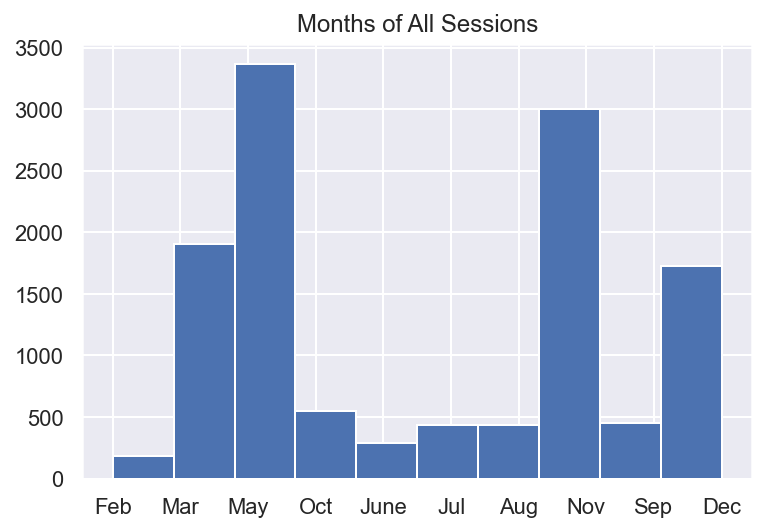

In [15]:
plt.hist(df['Month'])
plt.title('Months of All Sessions')

Popular months in terms of traffic for the website are May (27%), November (24%), March (15%), and December (14%) 

In [16]:
positive_mask = df['Revenue'] == True

In [17]:
df[positive_mask]['Month'].value_counts(normalize=True)

Nov     0.398323
May     0.191300
Dec     0.113208
Mar     0.100629
Oct     0.060273
Sep     0.045073
Aug     0.039832
Jul     0.034591
June    0.015199
Feb     0.001572
Name: Month, dtype: float64

Text(0.5, 1.0, 'Months of Sessions that Ended with Transaction')

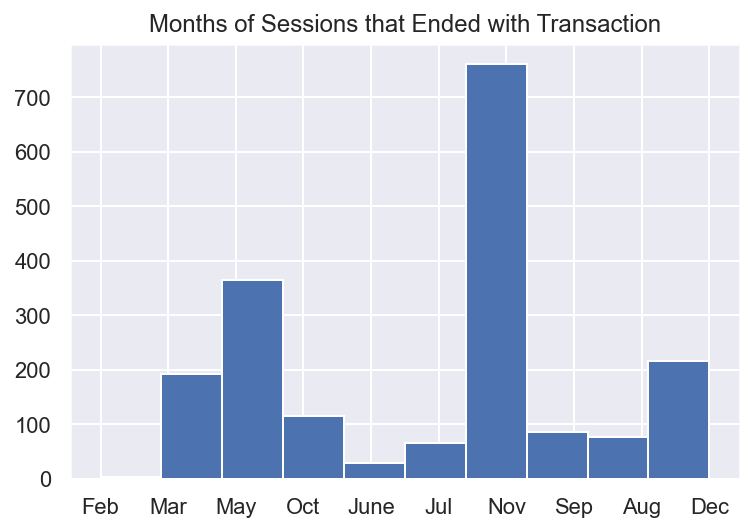

In [18]:
plt.hist(df[positive_mask]['Month'])
plt.title('Months of Sessions that Ended with Transaction')

Popular months for purchases are November (40%), May (19%), December (11%), and March (10%).

##### Traffic vs Transactions:
| Month | Percentage of All Sessions | Percentage of Sessions Ending with Transaction |
| --- | --- | --- |
| May | 27% | 19% |
| November | 24% | 40% |
| March | 15% | 10% |
| December | 14% | 11% |

It appears that November outperforms other months in terms of percentage of transactions even though it is ranked second in terms of traffic

##### Create dummy variables for Months

In [19]:
df_month_dummies = pd.get_dummies(df['Month'])

In [20]:
df_month_dummies.head()

Aug  Dec  Feb  Jul  June  Mar  May  Nov  Oct  Sep
0    0    0    1    0     0    0    0    0    0    0
1    0    0    1    0     0    0    0    0    0    0
2    0    0    1    0     0    0    0    0    0    0
3    0    0    1    0     0    0    0    0    0    0
4    0    0    1    0     0    0    0    0    0    0

In [21]:
# Add month dummy dataframe to df
df = pd.concat([df, df_month_dummies], axis=1)
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ... Aug  Dec  Feb  Jul  \
0         0.20       0.20         0.0         0.0  ...   0    0    1    0   
1         0.00       0.10         0.0         0.0  ...   0    0    1    0   
2         0.20       0.20         0.0         0.0  ...   0    0    1    0   
3         0.05       0.14         0.0         0.0  ...   0    0    1    0   
4         0.02       0.05         0.0         0.0  ...   0    0    1    0   

   June Mar  May  Nov  Oct  Sep  
0     0   0    0    0    0    0  
1     0   0    0    0    0    0  
2     0   0    0    0    0    0  
3     0   0    0    0    0    0  
4     0   0    0    0    0    0  

[5 rows x 28 columns]

In [22]:
# Drop original "Month" column
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May',
       'Nov', 'Oct', 'Sep'],
      dtype='object')

In [23]:
# Drop original "Month" column
df.drop('Month', axis=1, inplace=True)
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May',
       'Nov', 'Oct', 'Sep'],
      dtype='object')

### Categorical: Weekend

In [24]:
df['Weekend'].value_counts()
df['Weekend'].value_counts(normalize=True)

False    0.767397
True     0.232603
Name: Weekend, dtype: float64

About 23% sessions occurred on weekdays while 77% sessions occurred on weekdays.

##### Convert from boolean to 1's and 0's

In [25]:
df['Weekend'] = df['Weekend'].astype(int)

In [26]:
df[positive_mask]['Weekend'].value_counts(normalize=True)

0    0.73847
1    0.26153
Name: Weekend, dtype: float64

26% of sessions that ended in transactions occurred on weekends while 74% of sessions that ended in transactions occurred on weekdays. This distribution is not that different from the distribution of all cases, positive and negative, so this "Weekend" feature probably does not have high predictive value.

### Categorical: VisitorType

In [27]:
df['VisitorType'].value_counts(normalize=True)

Returning_Visitor    0.855718
New_Visitor          0.137388
Other                0.006894
Name: VisitorType, dtype: float64

Most customers (85.6%) are returning visitors, some are new visitors (13.8%), and the rest (0.7%) are "Other" visitors.

In [28]:
df[positive_mask]['VisitorType'].value_counts(normalize=True)

Returning_Visitor    0.770440
New_Visitor          0.221174
Other                0.008386
Name: VisitorType, dtype: float64

Across all positive sessions that ended with transaction, 77% were returning visitors and 22% were new visitors. Only 0.8% were "Other" visitors.

In [29]:
##### Create dummy variables for VisitorType
df_visitor_dummies = pd.get_dummies(df['VisitorType'])

In [30]:
df = pd.concat([df, df_visitor_dummies], axis=1)

In [31]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May',
       'Nov', 'Oct', 'Sep', 'New_Visitor', 'Other', 'Returning_Visitor'],
      dtype='object')

In [32]:
df['Other_Visitor'] = df['Other']
df.drop('Other', axis=1, inplace=True)

In [33]:
# Drop Other_Visitor because it has no predictive value
df.drop('Other_Visitor', axis=1, inplace=True)

In [34]:
# Drop original VisitorType column
df.drop('VisitorType', axis=1, inplace=True)

In [35]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'New_Visitor', 'Returning_Visitor'],
      dtype='object')

In [81]:
print('Percentage of new visitors that purchased: ')
print(df[positive_mask]['New_Visitor'].sum() / df['New_Visitor'].sum())

print('Percentage of returning visitors that purchased: ')
print(df[positive_mask]['Returning_Visitor'].sum() / df['Returning_Visitor'].sum())

Percentage of new visitors that purchased: 
0.24911452184179456
Percentage of returning visitors that purchased: 
0.1393232868922377


A greater percentage of all new visitors ended up purchasing than the percentage of all returning visitors that purchased.

### Categorical: TrafficType

In [36]:
df['TrafficType'].value_counts(normalize=True)

2     0.317356
1     0.198783
3     0.166423
4     0.086699
13    0.059854
10    0.036496
6     0.036010
8     0.027818
5     0.021087
11    0.020032
20    0.016058
9     0.003406
7     0.003244
15    0.003082
19    0.001379
14    0.001054
18    0.000811
16    0.000243
12    0.000081
17    0.000081
Name: TrafficType, dtype: float64

In [37]:
df[positive_mask]['TrafficType'].value_counts(normalize=True)

2     0.443920
1     0.137317
3     0.094340
4     0.086478
8     0.049790
10    0.047170
5     0.029350
6     0.027778
20    0.026205
11    0.024633
13    0.022537
7     0.006289
9     0.002096
14    0.001048
16    0.000524
19    0.000524
Name: TrafficType, dtype: float64

44% of positive sessions came from Traffic Type 2. However, there is no key in the research paper or UCI ML Repository indicating what traffic source this is. Therefore, it would add no interpretive value.

In [38]:
len(df['TrafficType'].unique())

20

There are 20 unique traffic sources

Let's drop this column since it adds no interpretive value unfortunately, and Traffic Source 2 is likely just a common way users navigate to the site.

In [39]:
df.drop('TrafficType', axis=1, inplace=True)

In [40]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'Weekend', 'Revenue', 'Aug',
       'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'New_Visitor', 'Returning_Visitor'],
      dtype='object')

### Categorical: Region

In [41]:
df['Region'].value_counts(normalize=True)

1    0.387672
3    0.194891
4    0.095864
2    0.092133
6    0.065288
7    0.061719
9    0.041444
8    0.035199
5    0.025791
Name: Region, dtype: float64

While 39% of positive sessions came from Region 1, there is no key provided by the paper or UCI ML Repository mapping the integer values to actual region names. Therefore this has no interpretive value. These values may just reflect population density across all regions but there is no way to know.

For the lack of clarity on what these mean, let's drop this feature.

In [42]:
df.drop('Region', axis=1, inplace=True)

In [43]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Weekend', 'Revenue', 'Aug', 'Dec',
       'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'New_Visitor',
       'Returning_Visitor'],
      dtype='object')

### Categorical: Browser

In [44]:
df['Browser'].value_counts(normalize=True)

2     0.645661
1     0.199676
4     0.059692
5     0.037875
6     0.014112
10    0.013220
8     0.010949
3     0.008516
13    0.004947
7     0.003974
12    0.000811
11    0.000487
9     0.000081
Name: Browser, dtype: float64

In [45]:
df[positive_mask]['Browser'].value_counts(normalize=True)

2     0.640985
1     0.191300
4     0.068134
5     0.045073
10    0.016771
8     0.011006
6     0.010482
13    0.008386
7     0.003145
3     0.002621
12    0.001572
11    0.000524
Name: Browser, dtype: float64

There is barely any difference among the distributions of browsers across all sessions vs across all positive cases. Furthermore, there is no key mapping these integers to the browser names, so let's drop this feature.

In [46]:
df.drop('Browser', axis=1, inplace=True)

In [47]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Weekend', 'Revenue', 'Aug', 'Dec', 'Feb', 'Jul',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'New_Visitor',
       'Returning_Visitor'],
      dtype='object')

### Categorical: OperatingSystems

In [48]:
df['OperatingSystems'].value_counts(normalize=True)

2    0.535361
1    0.209651
3    0.207218
4    0.038767
8    0.006407
6    0.001541
7    0.000568
5    0.000487
Name: OperatingSystems, dtype: float64

In [49]:
df[positive_mask]['OperatingSystems'].value_counts(normalize=True)

2    0.605346
1    0.198637
3    0.140461
4    0.044549
8    0.008910
6    0.001048
5    0.000524
7    0.000524
Name: OperatingSystems, dtype: float64

About 60% transactional sessions came from operating system 2, but we don't know which operating system this actually is. Additionally, the distributions of operating systems across all sessions vs. all positive sessions are not that different. Furthermore, it is not intuitive that a customer's operating system would predict whether or not they make an online purchase. So... let's drop this feature.

In [50]:
df.drop('OperatingSystems', axis=1, inplace=True)

In [51]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Revenue', 'Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'New_Visitor', 'Returning_Visitor'],
      dtype='object')

After exploration/cleaning, we have 13 categorical features:
- Weekend
- Aug, Dec, Feb, Jul, Jun, Mar, May, Nov, Oct, Sep (10 months)
- New_Visitor, Returning_Visitor (2 visitor types, where 0's for both mean "Other_Visitor")

### || Now we have explored all categorical features! Let's move onto numerical features... ||

The 10 numerical features in the dataset are:
- Administrative, Informational, ProductRelated
- Administrative_Duration, Informational_Duration, ProductRelated_Duration
- BounceRates
- ExitRates
- PageValues
- SpecialDay

## 3. Explore numerical features

For exploration purchases, let's create a new dataframe with numerical features and the target

In [52]:
df_numerical = df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Revenue']].copy()

In [53]:
df_numerical.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Revenue  
0         0.20       0.20         0.0         0.0        0  
1         0.00       0.10         0.0         0.0        0  
2         0.20       0.20         0.0         0.0        0  
3         0.05       0.14         0.0         0.0        0  
4         0.02       0.05         0.0         0.0        0

In [54]:
df_numerical.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay       Revenue  
count  12330.000000  12330.000000  12330.000000  12330.000000  12330.000000  
mean       0.022191      0.043073      5.889258      0.061427      0.154745  
std        0.048488      0.048597     18.568437      0.198917      0.361676  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.014286      0.000000      0.000000      0.000000  
50%        0.003112      0.025156      0.000000      0.000000      0.000000  
75%        0.016813      0.050000      0.000000      0.000000      0.000000  
max        0.200000      0.200000    361.763742      1.000000      1.000000

##### Let's look at histograms of all the numerical features

<Figure size 432x288 with 0 Axes>

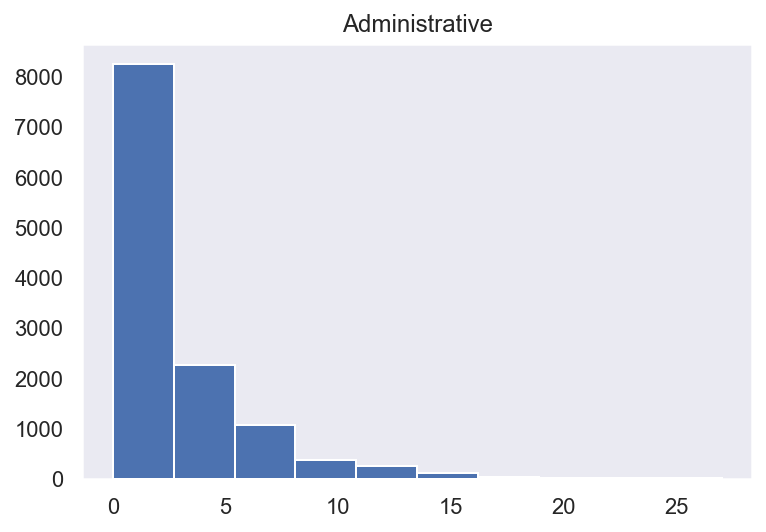

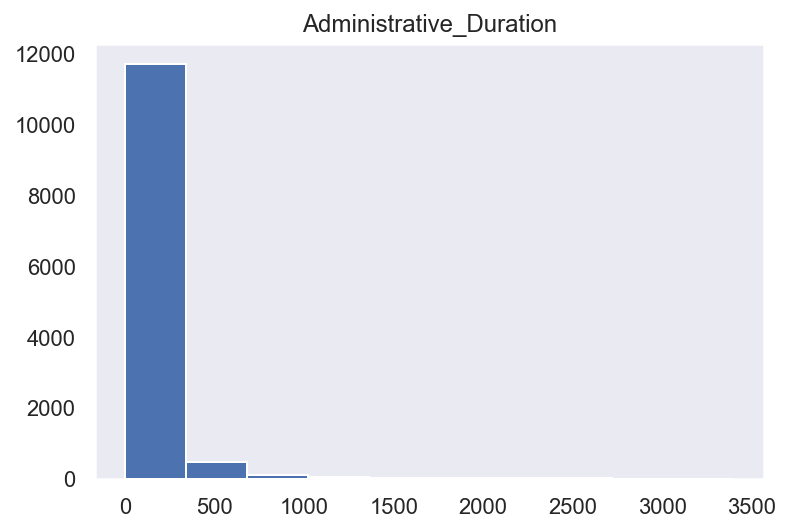

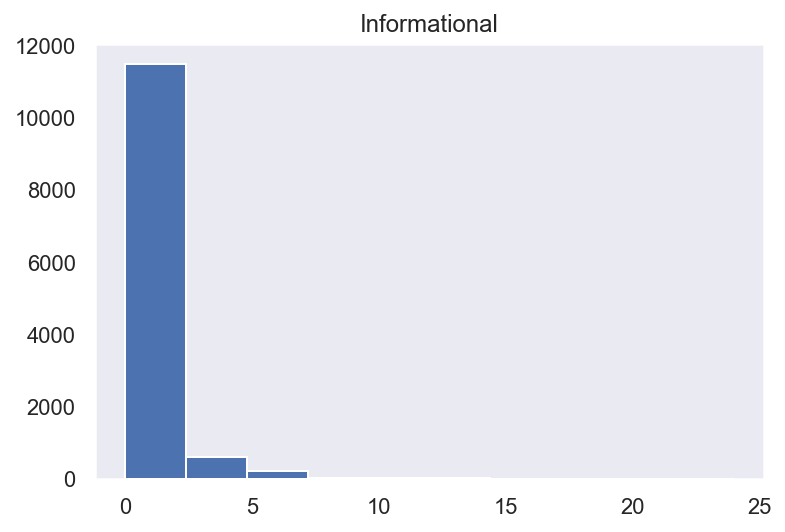

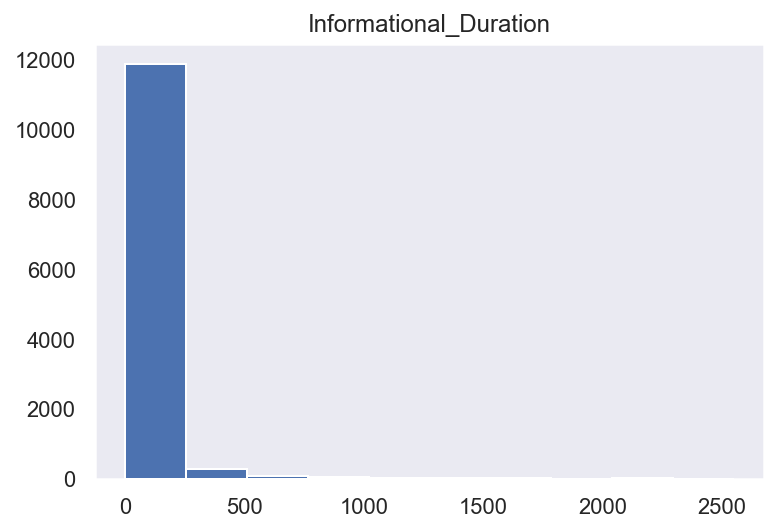

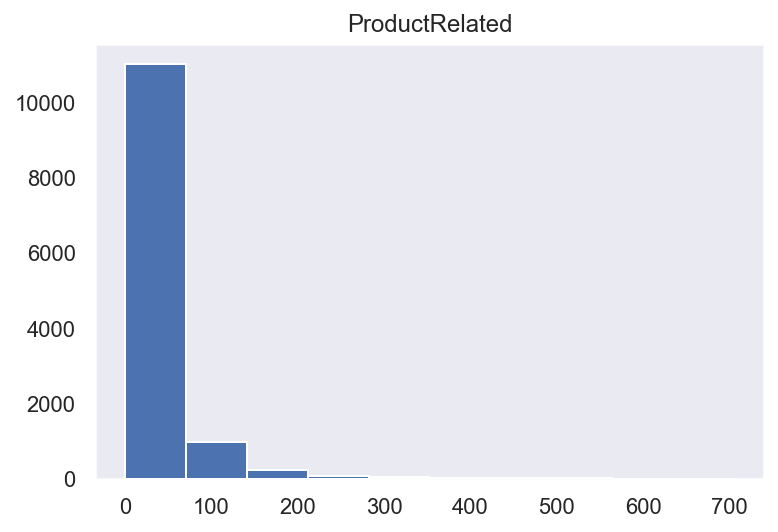

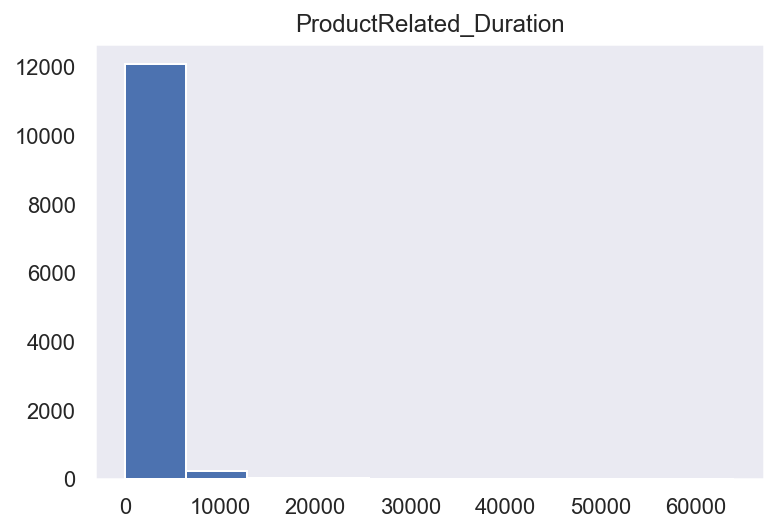

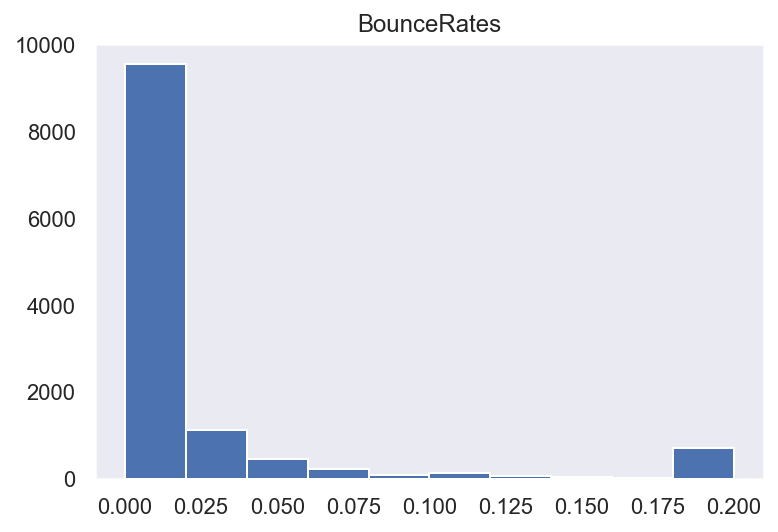

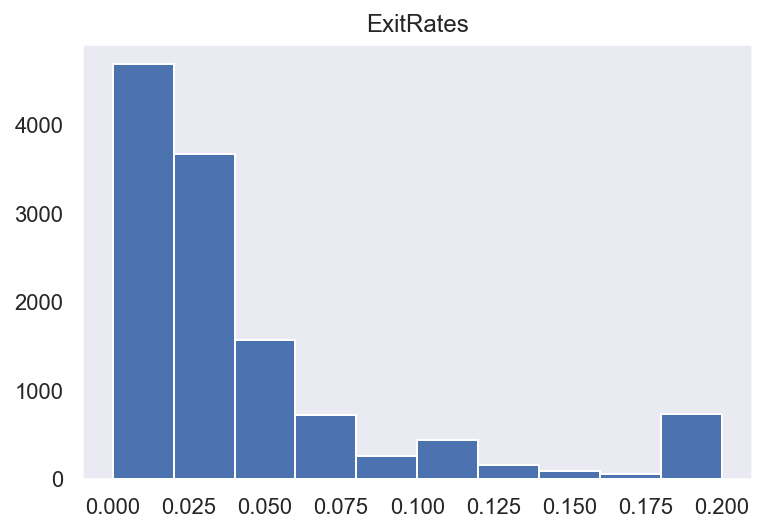

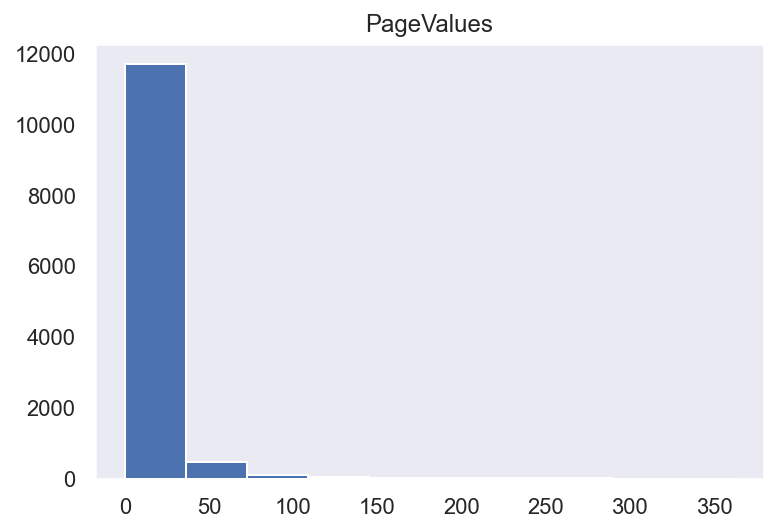

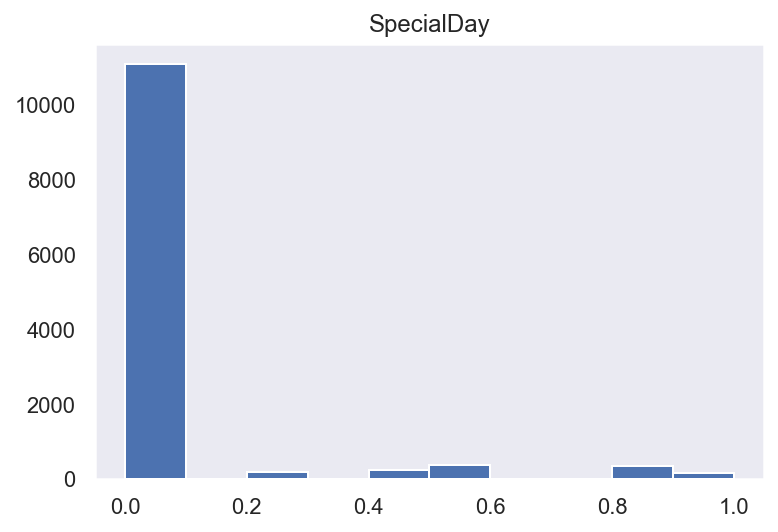

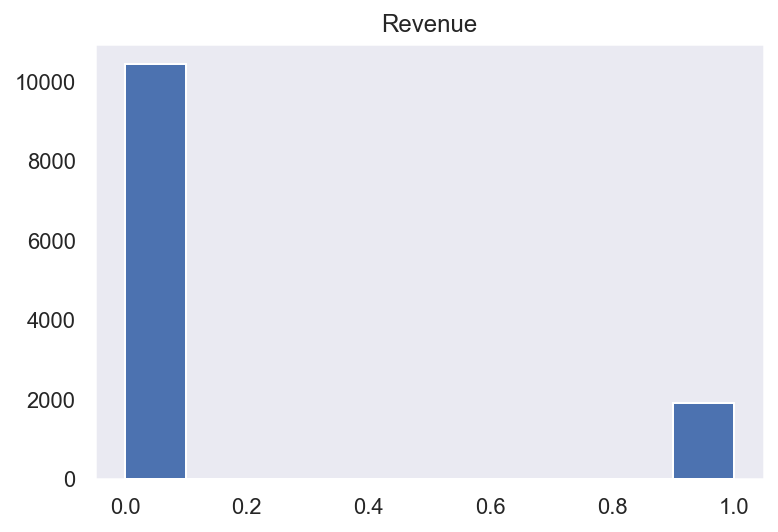

In [55]:
for idx,column in enumerate(df_numerical.columns): 
    plt.figure(idx)
    df_numerical.hist(column=column,grid=False)

In [56]:
# Filtering for positive cases and looking at stats for numerical features
positive_mask_numerical = df_numerical['Revenue'] == 1
df_numerical[positive_mask_numerical].describe()

Administrative  Administrative_Duration  Informational  \
count     1908.000000              1908.000000    1908.000000   
mean         3.393606               119.483244       0.786164   
std          3.730527               201.114732       1.521176   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          2.000000                52.366667       0.000000   
75%          5.000000               151.083333       1.000000   
max         26.000000              2086.750000      12.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             1908.000000     1908.000000              1908.000000   
mean                57.611427       48.210168              1876.209615   
std                171.619131       58.267365              2312.214392   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000       15.000000               541.906250   
50%                  0.000000       29.000000              1109.906250   
75%                 19.000000       57.000000              2266.011310   
max               1767.666667      534.000000             27009.859430   

       BounceRates    ExitRates   PageValues   SpecialDay  Revenue  
count  1908.000000  1908.000000  1908.000000  1908.000000   1908.0  
mean      0.005117     0.019555    27.264518     0.023166      1.0  
std       0.012185     0.016463    35.191954     0.123521      0.0  
min       0.000000     0.000000     0.000000     0.000000      1.0  
25%       0.000000     0.009521     3.641144     0.000000      1.0  
50%       0.000000     0.016000    16.758134     0.000000      1.0  
75%       0.006452     0.025000    38.897742     0.000000      1.0  
max       0.200000     0.200000   361.763742     1.000000      1.0

##### Let's look at the numerical data on a pairplot and inspect for feature interactions

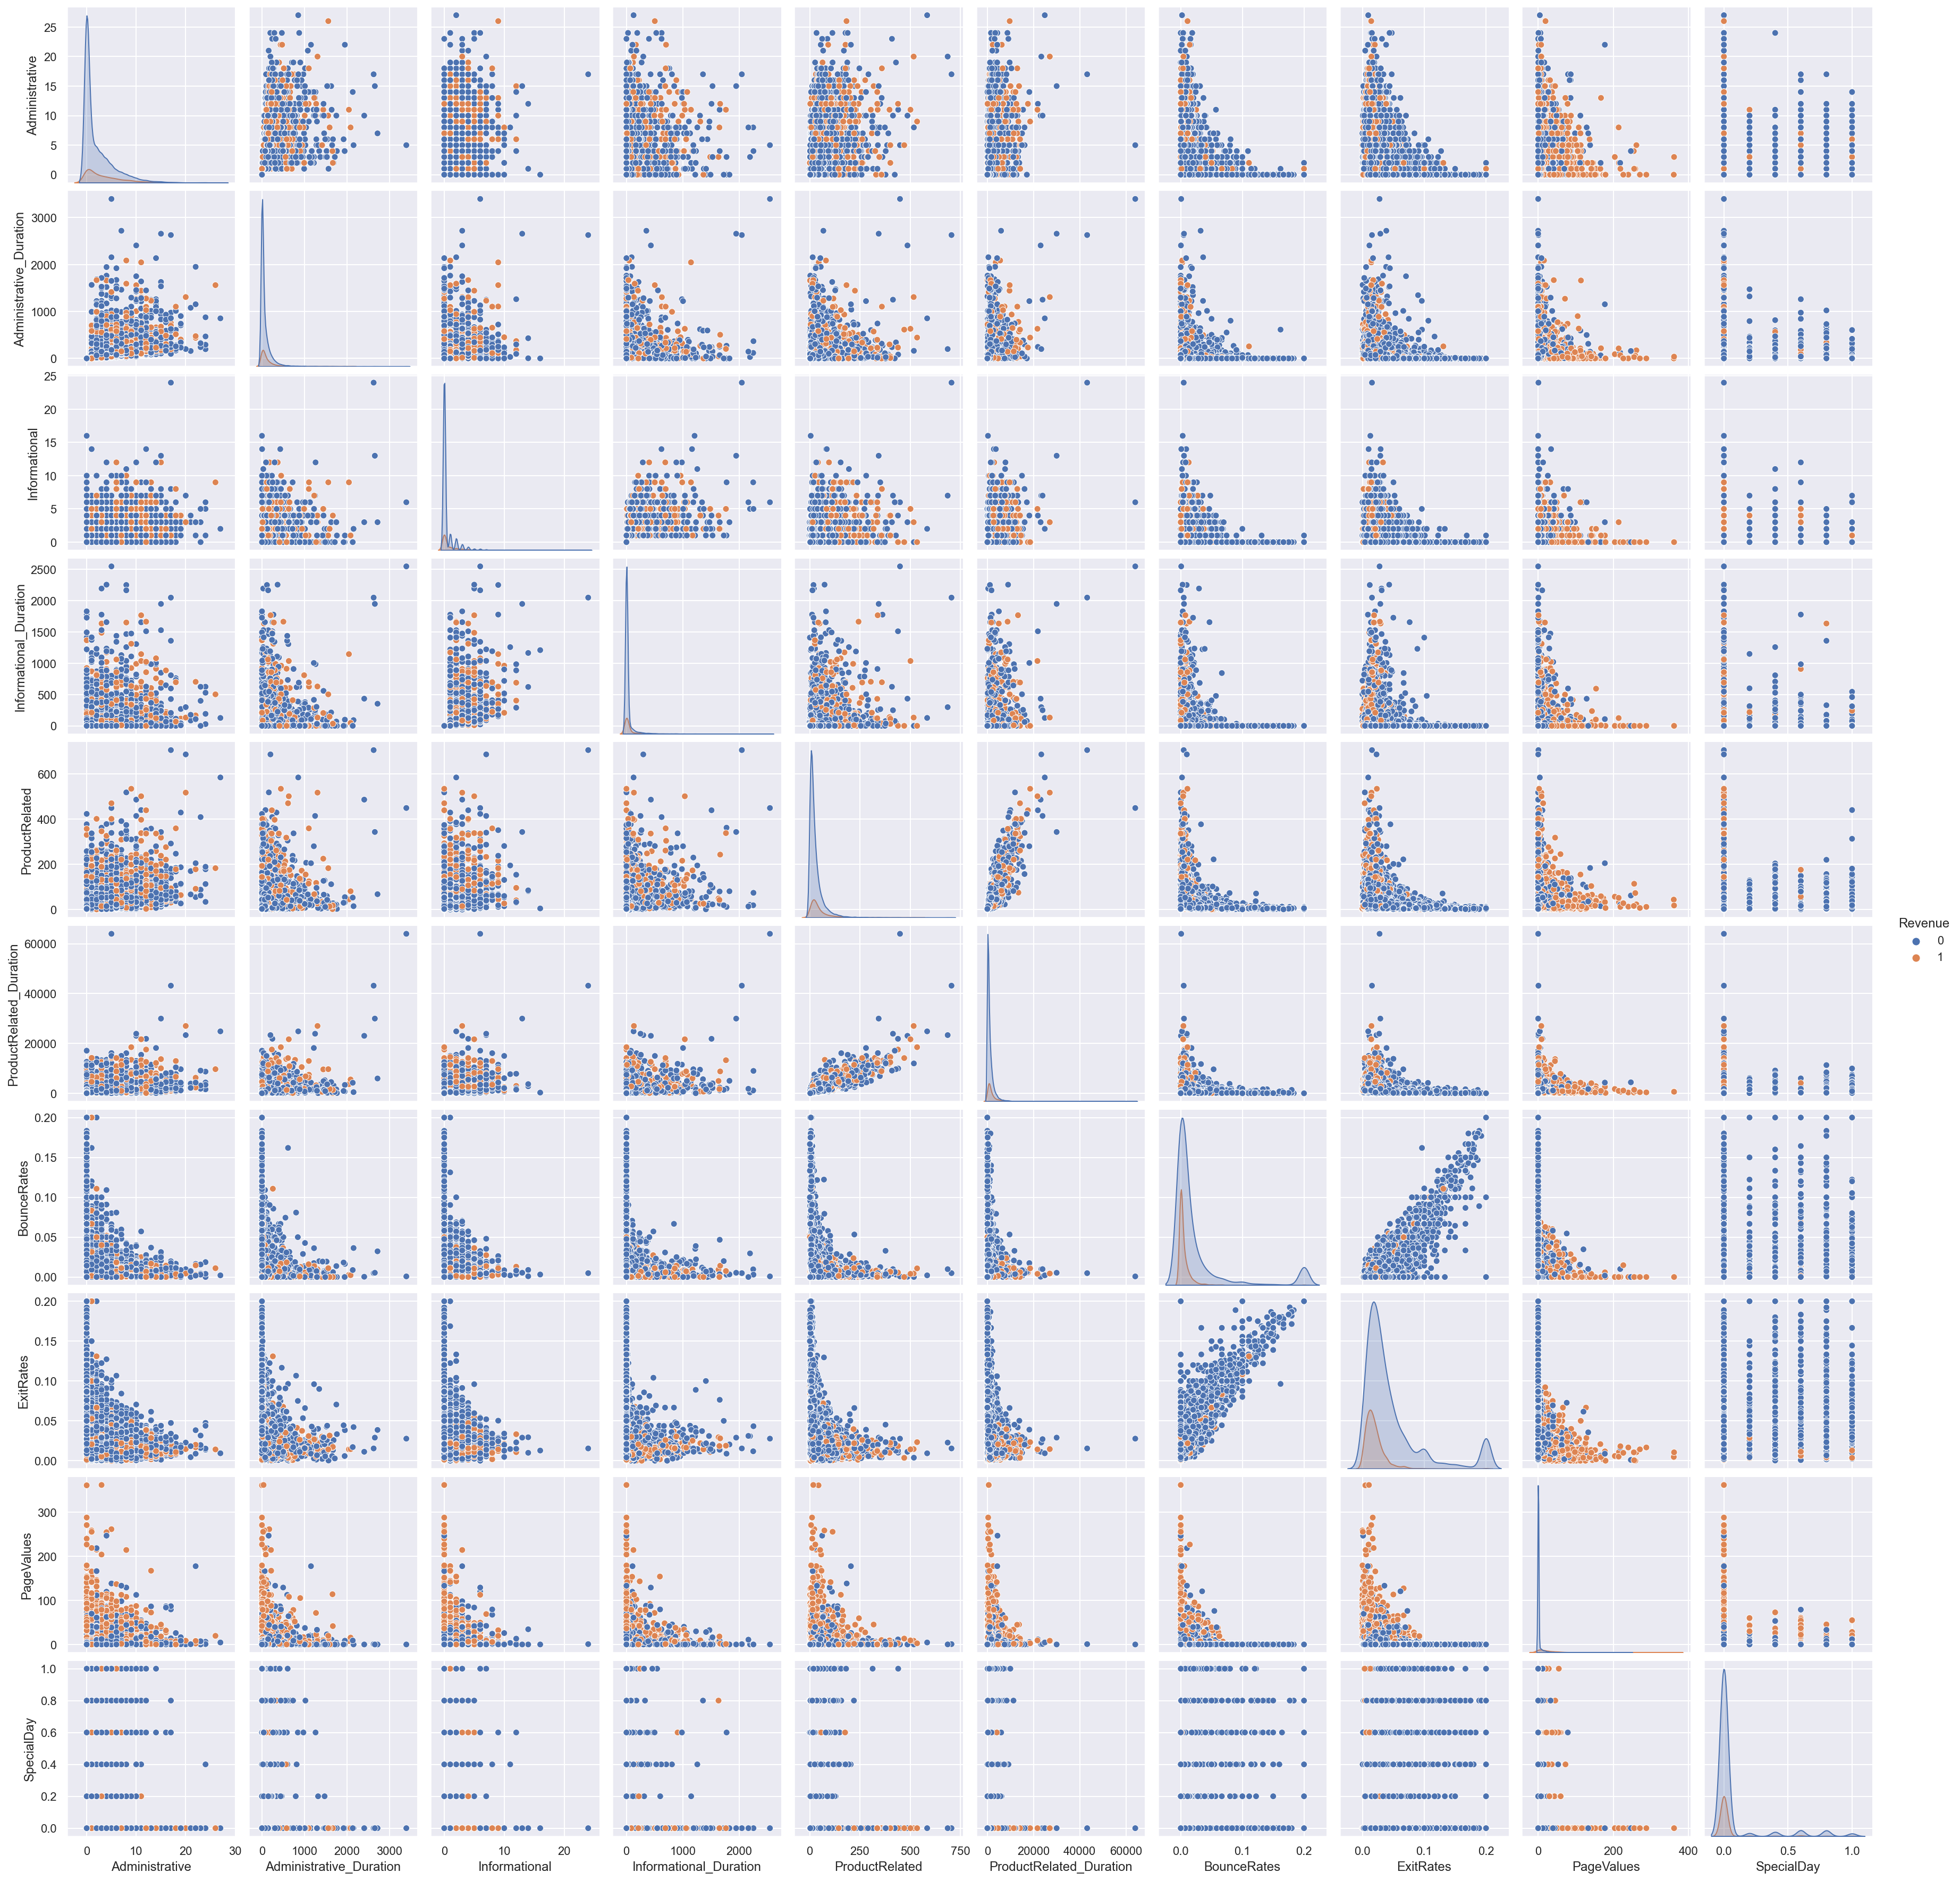

In [57]:
sns.pairplot(df_numerical, hue='Revenue')

So far there does not look like great separability for positive and negative distrubutions among numerical features

##### Let's look at collinearity for the numerical features

<AxesSubplot:>

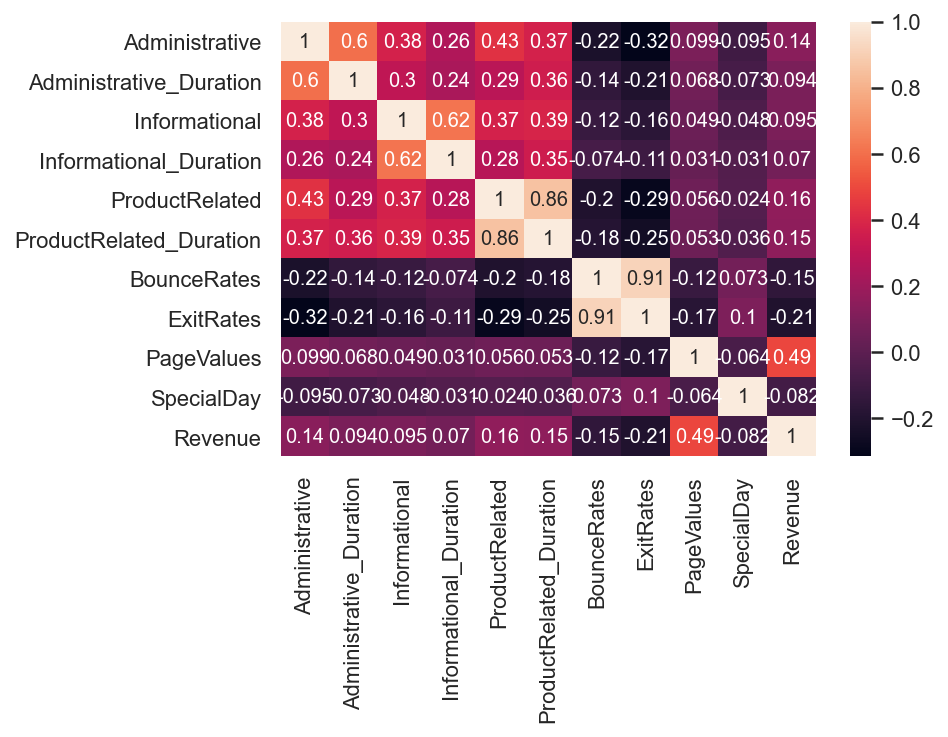

In [58]:
sns.heatmap(df_numerical.corr(), annot=True)

**Observations:**
We can see that all of the page types are correlated with their corresponding durations, so we may want to remove either the page types or the durations. For example:
- Administrative and Administrative_Duration: 0.6
- Informational and Informational_Duration: 0.62
- ProductRelated and ProductRelated_Duration: 0.86

Also, in general, in the top left we can see a lot of correlation among all the page types.

Additionally, ExitRates and BounceRates are highly correlated (0.91), so we will definitely have to drop one of these features. Also, they are negatively correlated with Revenue which makes sense because the more a user exits or leaves the site from a given page, the less likely they are to purchase.

PageValues is also pretty correlated with the target Revenue (0.49) , but that is because this is a feature in dollars that that is uses revenue in its formula

**Potential Predictive numerical features:**
Based on the correlations with Revenue, potential predictive features may be PageValues, ProductRelated/ProductRelated_Duration, and Administrative.

### Engineer a new feature combining page type and duration

To remove some of the collinearity among the page type categories and their respective durations, let's engineer a new feature combining both page type and duration. Since we have number of pages visited by the user per category AND total time spent on pages per category, we can easily create features for average time spent on each category type's pages.

That way we can capture both features in one which will also reduce complexity by reducing the number of features for the model.

In [59]:
def AvgTime(count, duration):
    if duration == 0:
        avg = 0
    elif duration != 0:
        avg = float(duration)/float(count)
    return avg
    
Columns = [['Administrative', 'Administrative_Duration'], ['Informational', 'Informational_Duration'], ['ProductRelated', 'ProductRelated_Duration']]
    
    
df['Avg_Administrative'] = df.apply(lambda x: AvgTime(count = x['Administrative'], duration = x['Administrative_Duration']), axis = 1)
df['Avg_Informational'] = df.apply(lambda x: AvgTime(count = x['Informational'], duration = x['Informational_Duration']), axis = 1)
df['Avg_ProductRelated'] = df.apply(lambda x: AvgTime(count = x['ProductRelated'], duration = x['ProductRelated_Duration']), axis = 1)

df.drop(['Administrative', 'Administrative_Duration','Informational', 'Informational_Duration','ProductRelated', 'ProductRelated_Duration'], axis = 1, inplace = True)

In [60]:
df.columns

Index(['BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Revenue', 'Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'New_Visitor', 'Returning_Visitor', 'Avg_Administrative',
       'Avg_Informational', 'Avg_ProductRelated'],
      dtype='object')

In [61]:
# Inspect these new features
df['Avg_Administrative'].describe()

count    12330.000000
mean        20.196282
std         45.995553
min          0.000000
25%          0.000000
50%          5.091667
75%         24.360119
max       1566.600000
Name: Avg_Administrative, dtype: float64

In [62]:
df['Avg_Informational'].describe()

count    12330.000000
mean        14.807761
std         65.551312
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1778.000000
Name: Avg_Informational, dtype: float64

In [63]:
df['Avg_ProductRelated'].describe()

count    12330.000000
mean        37.633690
std         44.767916
min          0.000000
25%         17.613281
50%         28.878189
75%         45.084444
max       1411.000000
Name: Avg_ProductRelated, dtype: float64

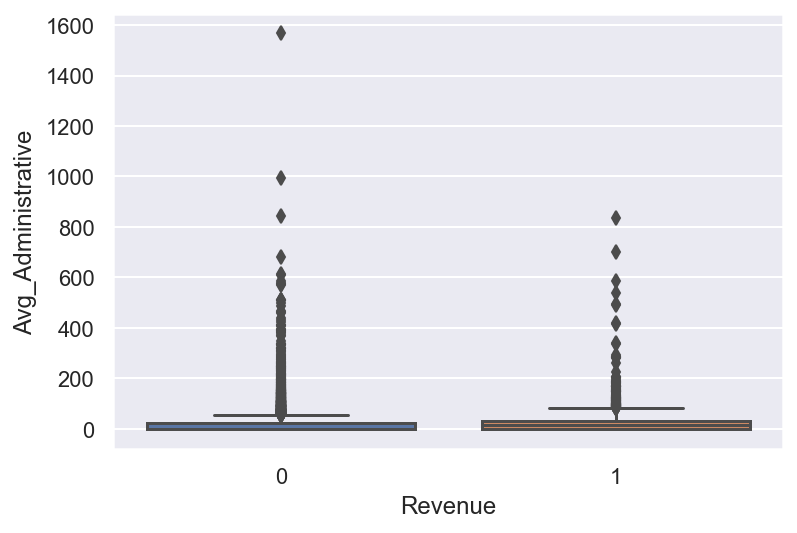

In [64]:
sns.boxplot(x='Revenue', y='Avg_Administrative', data=df);

Looks like there are outliers. For example, the max average time in spent on administrative pages by a user is 1566.6 seconds or 26 minutes. This is a pretty long time but the user may not have been active on the page, and it is still possible to spend this long on a page. This could be a case when the user had technical difficulties. This session was a negative case and did not end in transaction.

<AxesSubplot:xlabel='Revenue', ylabel='Avg_Informational'>

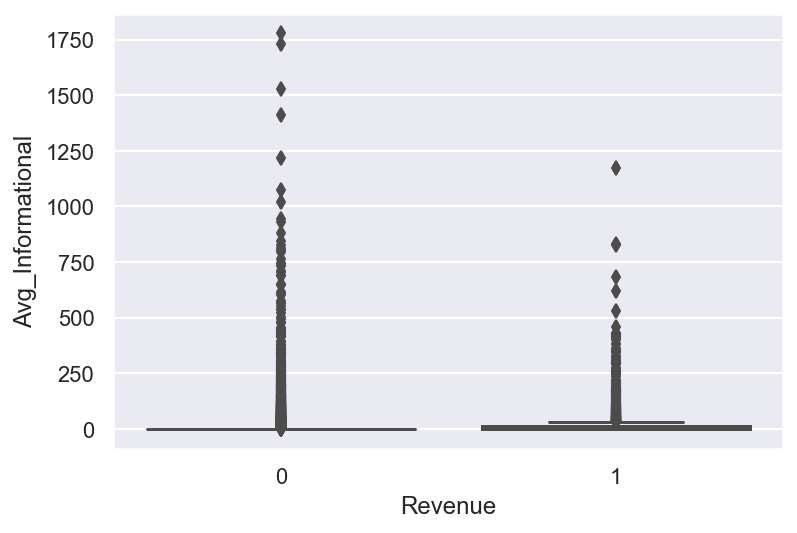

In [65]:
sns.boxplot(x='Revenue', y='Avg_Informational', data=df)

<AxesSubplot:xlabel='Revenue', ylabel='Avg_ProductRelated'>

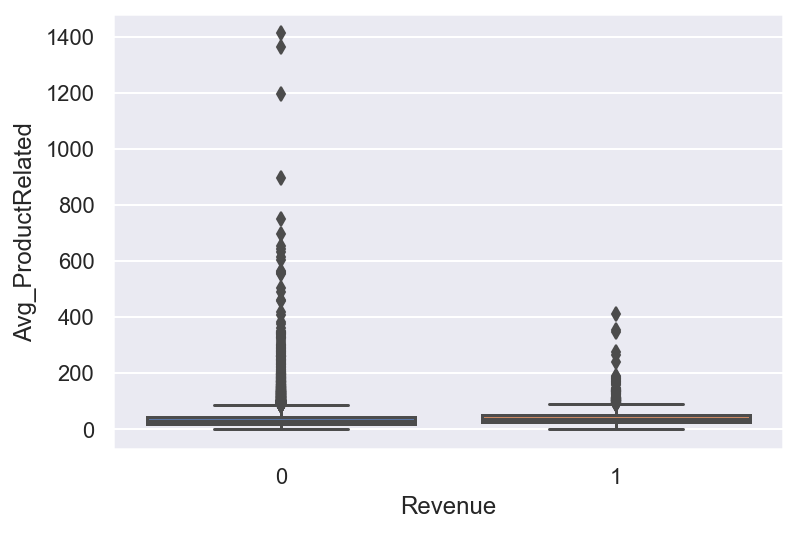

In [66]:
sns.boxplot(x='Revenue', y='Avg_ProductRelated', data=df)

##### Let's look at Bounce Rates and Exit Rates

<AxesSubplot:xlabel='Revenue', ylabel='BounceRates'>

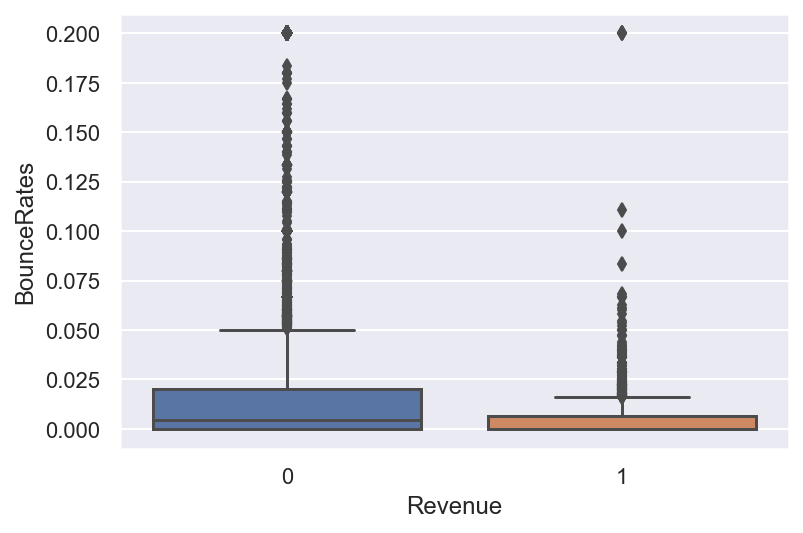

In [67]:
sns.boxplot(x='Revenue', y='BounceRates', data=df)

<AxesSubplot:xlabel='Revenue', ylabel='ExitRates'>

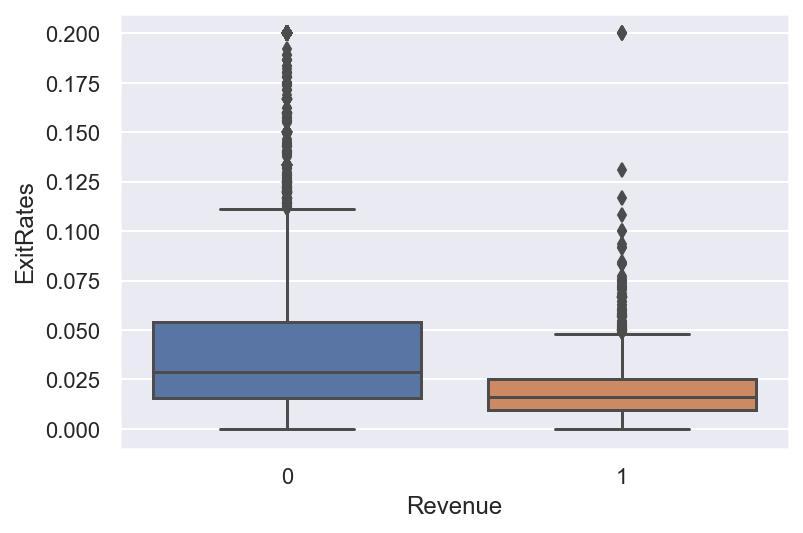

In [68]:
sns.boxplot(x='Revenue', y='ExitRates', data=df)

There looks like pretty good separation between positive and negative cases for exit rates

##### Let's look at Page Values

<AxesSubplot:xlabel='Revenue', ylabel='PageValues'>

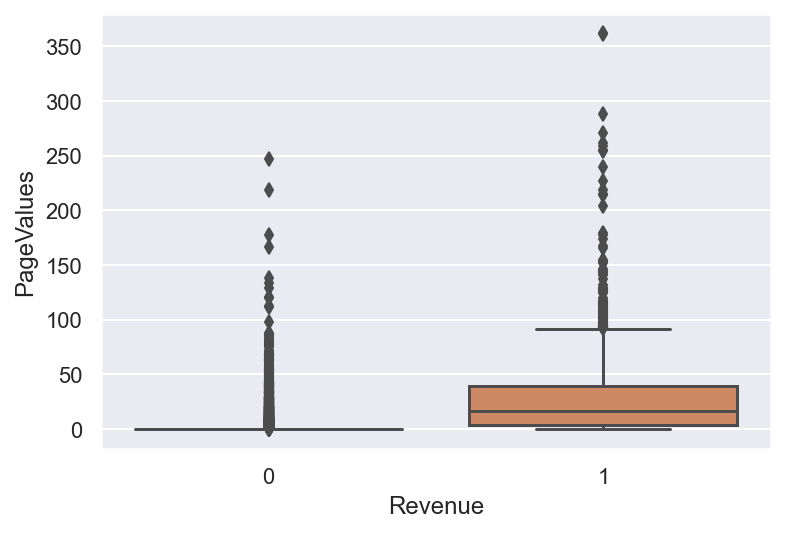

In [69]:
sns.boxplot(x='Revenue', y='PageValues', data=df)

If users visit pages with higiher page values, they are more likely to purchase.

##### Let's look at SpecialDay

<AxesSubplot:xlabel='Revenue', ylabel='SpecialDay'>

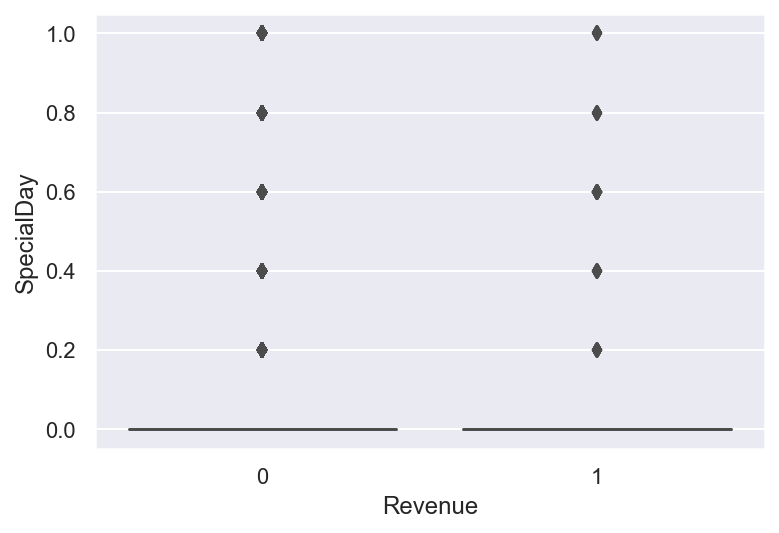

In [70]:
sns.boxplot(x='Revenue', y='SpecialDay', data=df)

This looks like it would have very little predictive value. The correlation to Revenue from the heatmap earlier was -0.082

Text(0.5, 1.0, 'Distribution of Special Day Values')

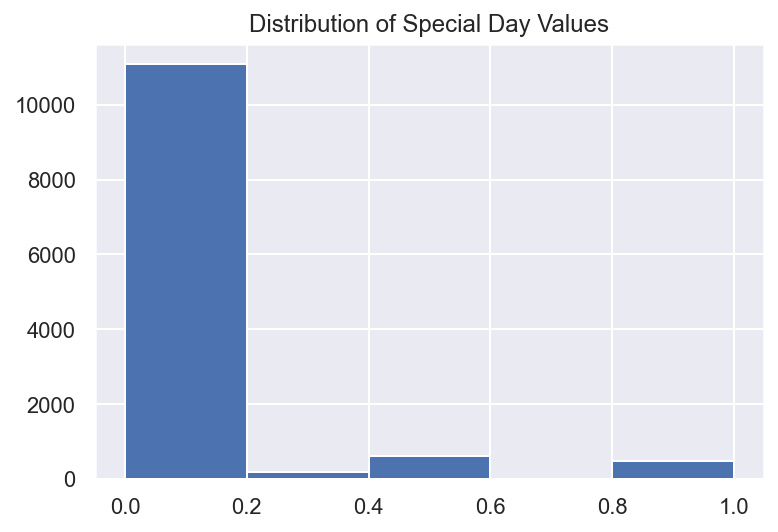

In [71]:
plt.figure()
plt.hist(df['SpecialDay'], bins=5)
plt.title('Distribution of Special Day Values')

Of 12,330 observations, 11,079 SpecialDay values are 0.0.

### Now let's look at all the features we have after removing some and engineering some.

In [72]:
df.columns

Index(['BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Revenue', 'Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'New_Visitor', 'Returning_Visitor', 'Avg_Administrative',
       'Avg_Informational', 'Avg_ProductRelated'],
      dtype='object')

Numerical Features:
1. BounceRates
2. ExitRates
3. PageValues
4. SpecialDay
5. Avg_Administrative
6. Avg_Informational
7. Avg_ProductRelated

Categorical Features:
1. Weekend
2. New_Visitor
3. Returning_Visitor
4. Feb
5. Mar
6. May
7. June
8. Jul
9. Aug
10. Sept
11. Oct
12. Nov
13. Dec

<AxesSubplot:xlabel='Revenue', ylabel='Weekend'>

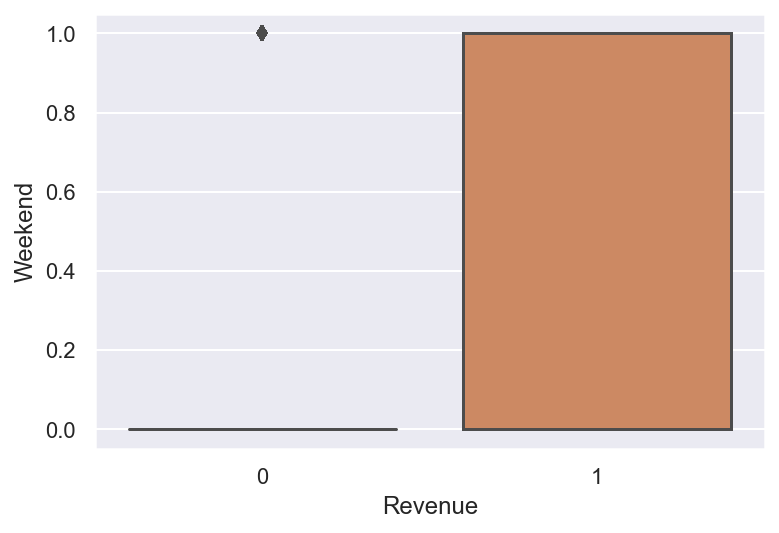

In [73]:
sns.boxplot(x='Revenue', y='Weekend', data=df)

### Looking at the correlation of all features to Revenue

<AxesSubplot:>

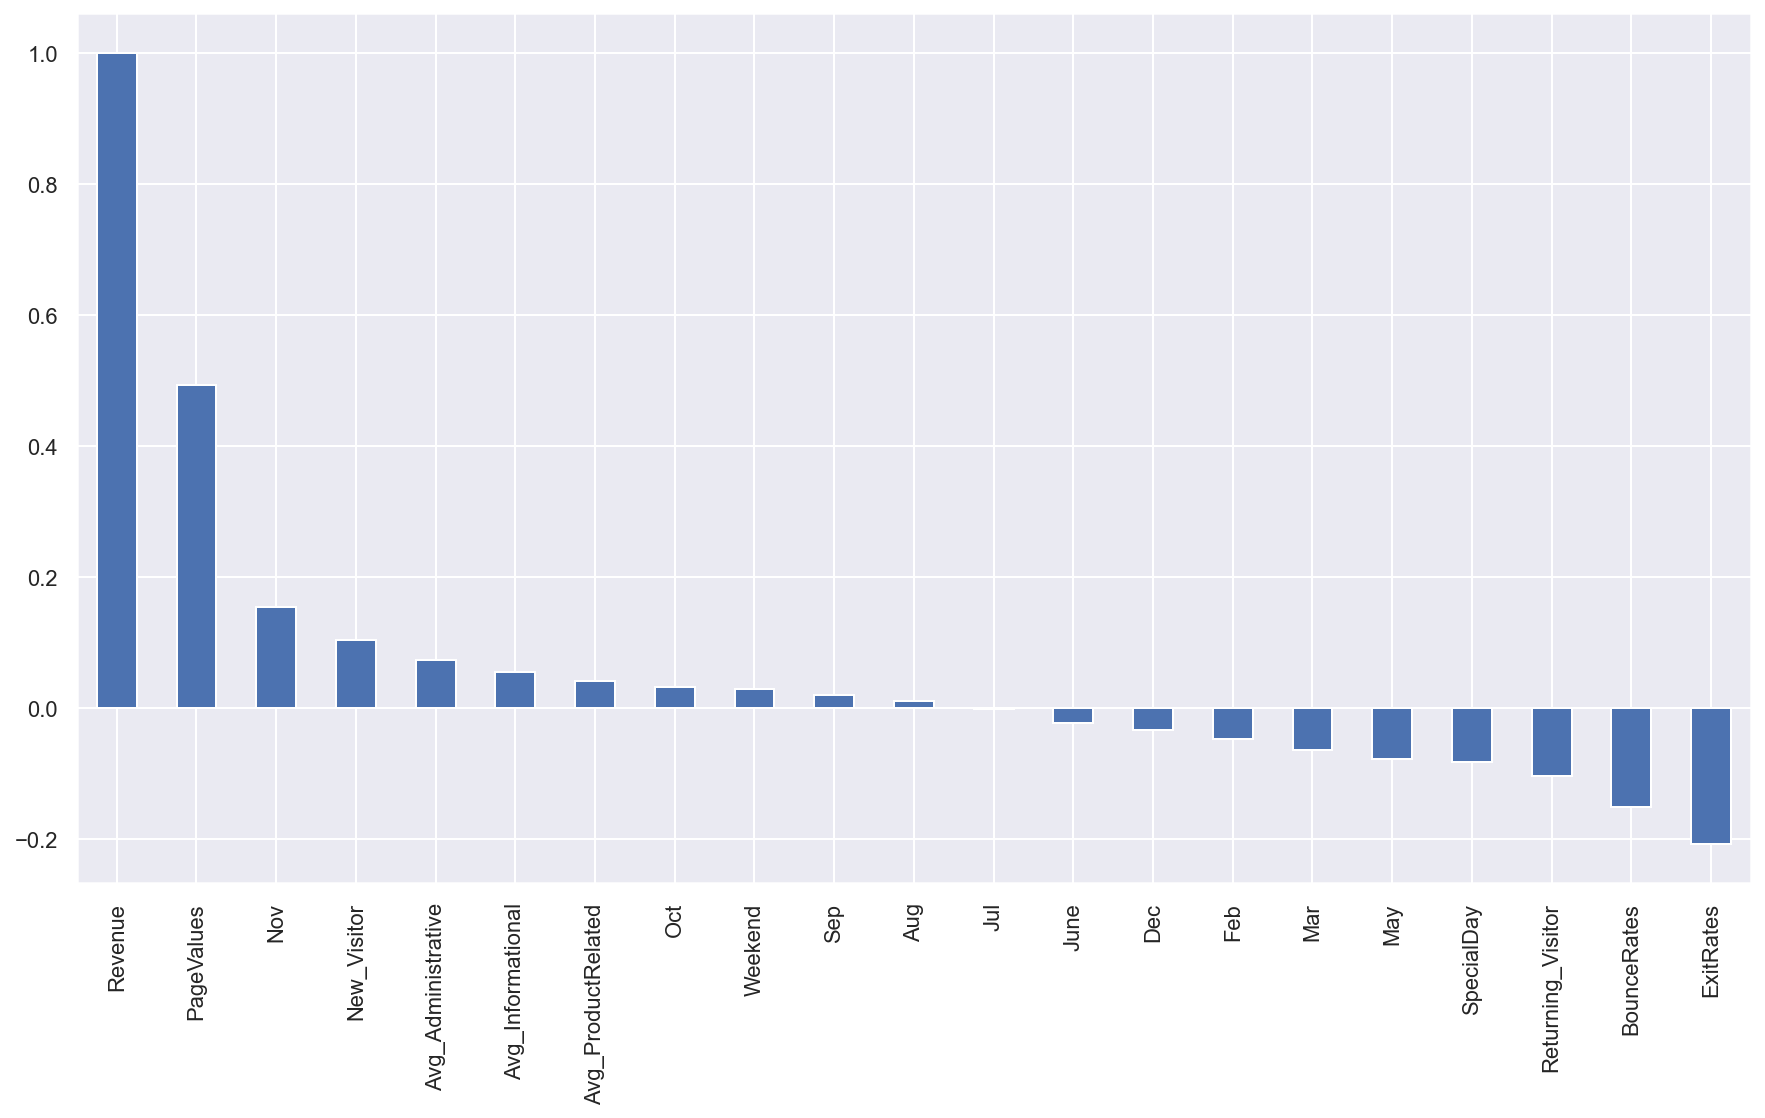

In [74]:
plt.figure(figsize=(15,8))
df.corr()['Revenue'].sort_values(ascending = False).plot(kind='bar')

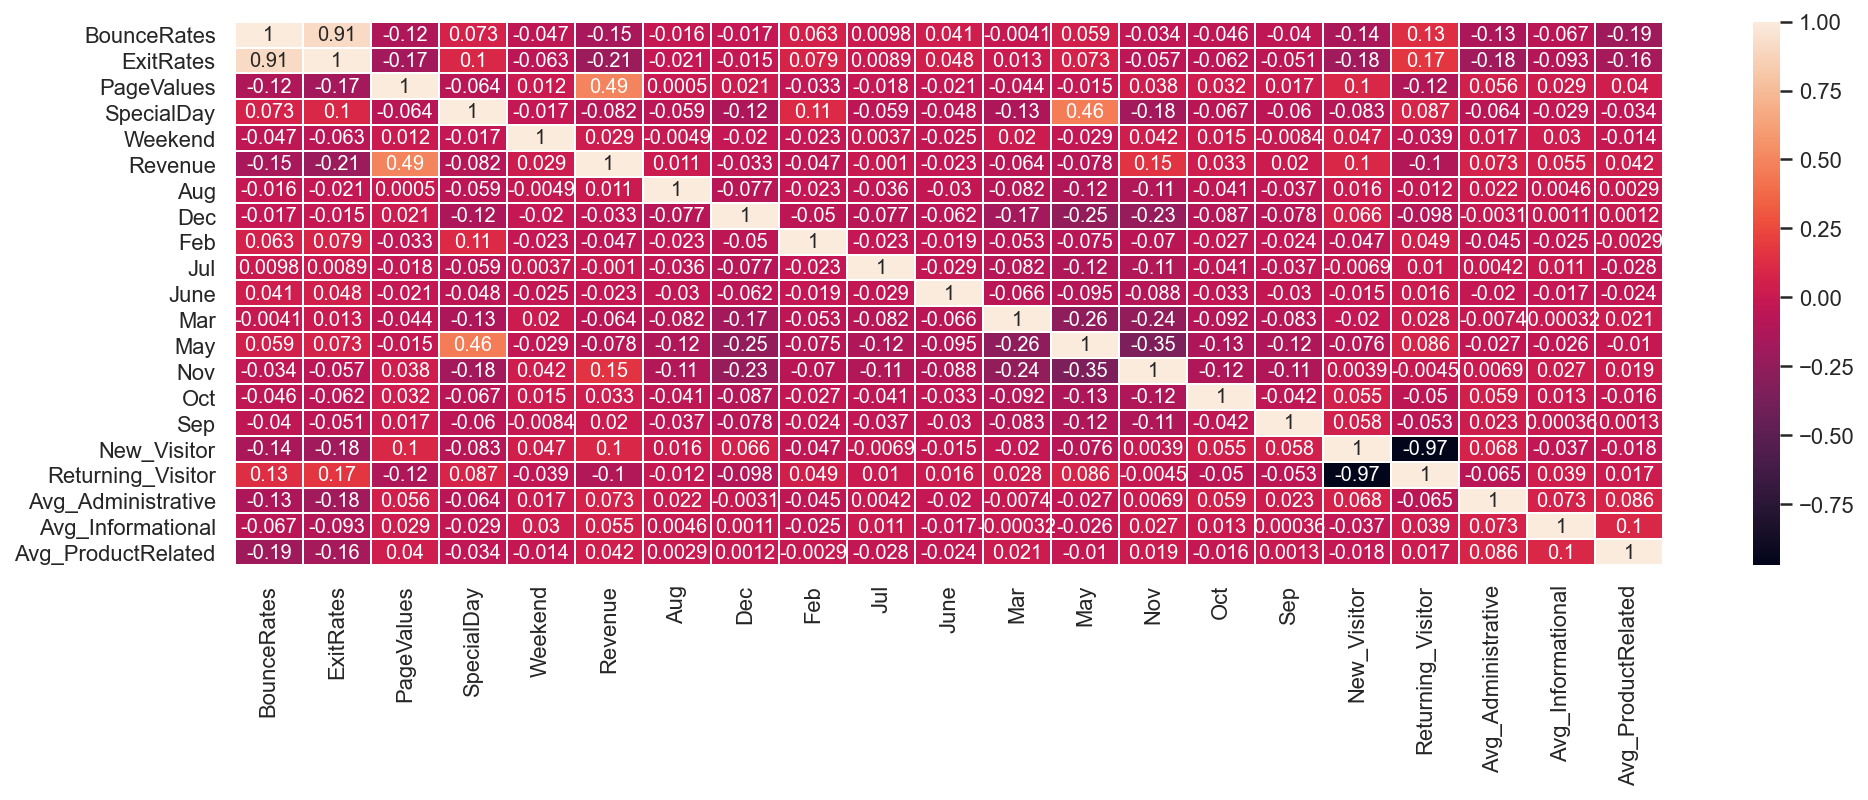

In [83]:

plt.figure(figsize = (16,5))

ax = sns.heatmap(df.corr(), annot=True, linewidths=.5)


## Baseline Model: Logistic Regression on Handful of Features

### Importing packages

In [88]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# modeling imports
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier -- have to install
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import precision_score, recall_score, fbeta_score, make_scorer, confusion_matrix

### Setting handful of features and target

In [89]:
X = df[['Nov', 'May', 'New_Visitor', 'PageValues', 'Avg_Administrative', 'Avg_Informational', 'Avg_ProductRelated', 'ExitRates']].copy()
y = df['Revenue'].values

### Splitting data into train and test sets

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Cross validating the LogisticRegression model and looking at the precision, recall, and F2 scores¶

In [91]:
scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f2_score' : make_scorer(fbeta_score, beta=2)}

logistic_model = LogisticRegression(max_iter=10000)

results = cross_validate(logistic_model, X_train, y_train, cv=5, scoring=scoring)

for metric_name in results.keys():
    average_score = np.average(results[metric_name])
    print("Metric:", metric_name)
    print("Scores:", results[metric_name])
    print("Average score:", average_score)
    print(" ")

Metric: fit_time
Scores: [0.276124   0.12732005 0.26051927 0.15041685 0.14994383]
Average score: 0.1928647994995117
 
Metric: score_time
Scores: [0.00624299 0.00555491 0.00623679 0.00528407 0.00554013]
Average score: 0.005771780014038086
 
Metric: test_precision
Scores: [0.82307692 0.7578125  0.78666667 0.69945355 0.77931034]
Average score: 0.7692639972967489
 
Metric: test_recall
Scores: [0.35785953 0.32441472 0.39333333 0.42666667 0.37792642]
Average score: 0.3760401337792642
 
Metric: test_f2_score
Scores: [0.40346908 0.3663142  0.43703704 0.46276211 0.42132737]
Average score: 0.4181819590721402
 


### Looking at the confusion matrix

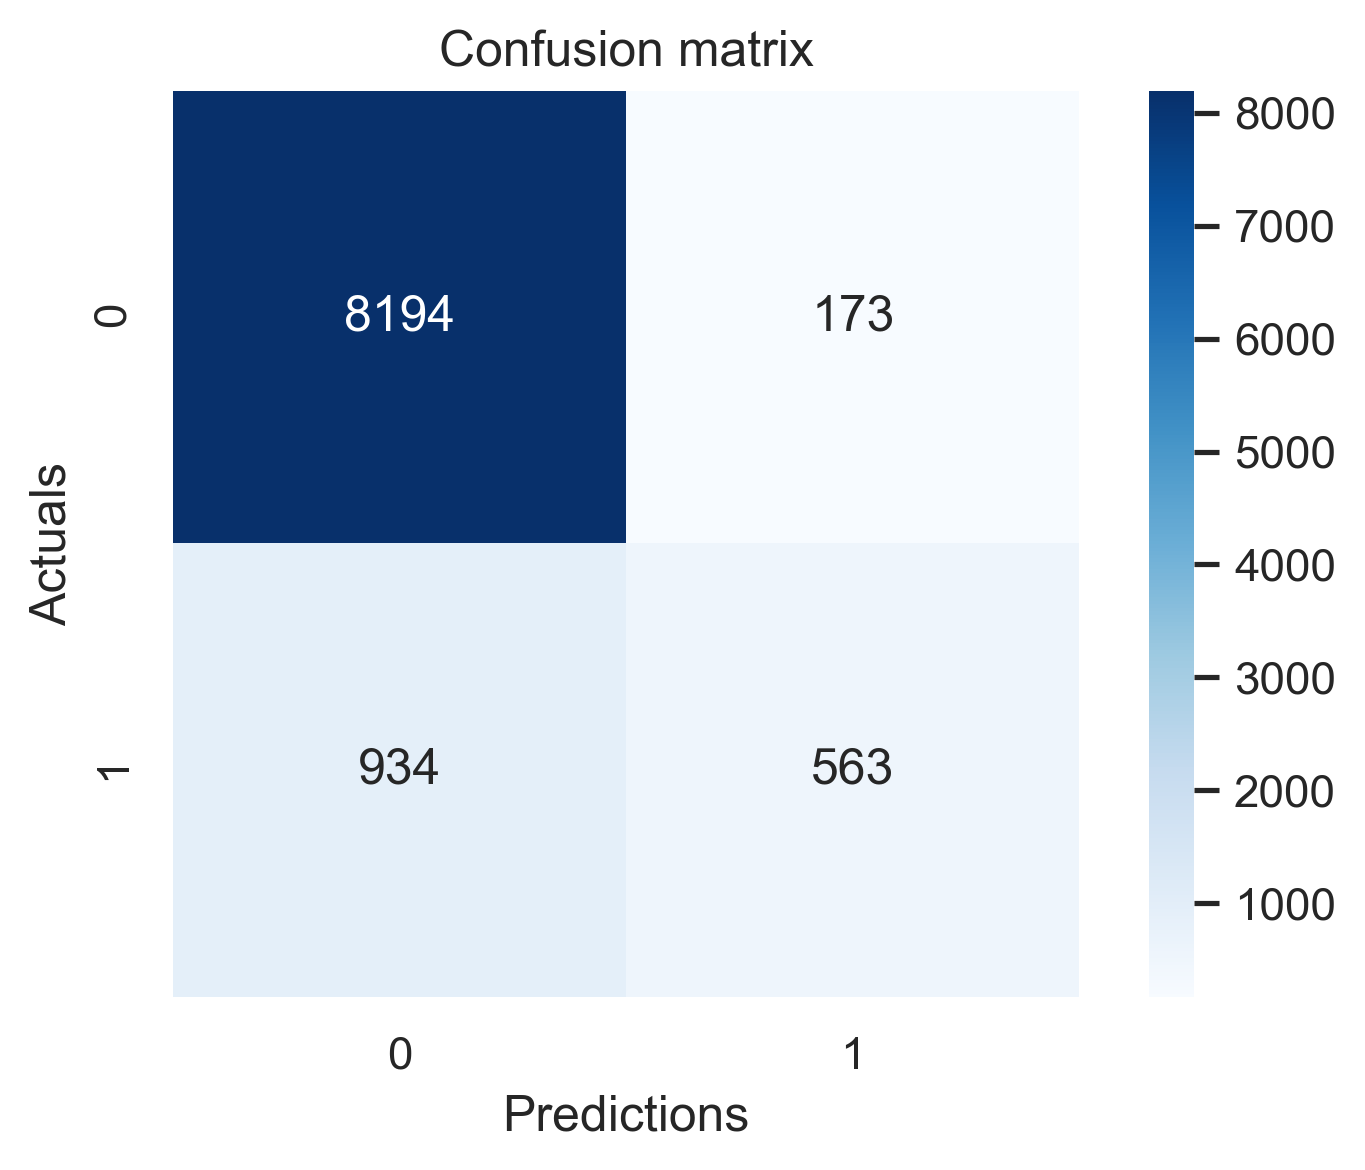

In [107]:

logistic_model = LogisticRegression(max_iter=10000)

y_pred = cross_val_predict(logistic_model, X_train, y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)

plt.figure(dpi=150)


sns.heatmap(conf_mat, cmap=plt.cm.Blues, annot=True, square=True, fmt="")
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion matrix');

In [95]:
df['Revenue'].value_counts(normalize=True)

0    0.845255
1    0.154745
Name: Revenue, dtype: float64

In [108]:
# try all features
X = df.drop('Revenue', axis=1)
y = df['Revenue'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [109]:
scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f2_score' : make_scorer(fbeta_score, beta=2)}

logistic_model = LogisticRegression(max_iter=10000)

results = cross_validate(logistic_model, X_train, y_train, cv=5, scoring=scoring)

for metric_name in results.keys():
    average_score = np.average(results[metric_name])
    print("Metric:", metric_name)
    print("Scores:", results[metric_name])
    print("Average score:", average_score)
    print(" ")

Metric: fit_time
Scores: [0.96953893 0.79459596 0.76673579 0.66054392 0.6748879 ]
Average score: 0.773260498046875
 
Metric: score_time
Scores: [0.00605679 0.00533414 0.00573111 0.00538087 0.00553179]
Average score: 0.005606937408447266
 
Metric: test_precision
Scores: [0.8125     0.7480315  0.78231293 0.71195652 0.75675676]
Average score: 0.7623115399457895
 
Metric: test_recall
Scores: [0.34782609 0.31772575 0.38333333 0.43666667 0.37458194]
Average score: 0.37202675585284284
 
Metric: test_f2_score
Scores: [0.39274924 0.3590325  0.42687454 0.4732659  0.41666667]
Average score: 0.41371776904579977
 


### Save the cleaned dataframe to csv

In [112]:
df.to_csv('online_shoppers_intention_cleaned.csv', index=False)

In [5]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [20]:
returning = df['VisitorType'] == 'Returning_Visitor'

In [21]:
new = df['VisitorType'] == 'New_Visitor'

In [22]:
len(df[returning])

10551

In [23]:
len(df[new])

1694

In [24]:
df[returning]['Revenue'].value_counts()

False    9081
True     1470
Name: Revenue, dtype: int64

In [25]:
df[new]['Revenue'].value_counts()

False    1272
True      422
Name: Revenue, dtype: int64